In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [2]:
Na_bkg = pd.read_csv("Data/Na_Setting_Background.csv", skiprows=21, engine="python") # names=init_run_cols,

Na_bkg["Norm_Counts"] = Na_bkg["Counts"].copy() / 63450
Na_bkg["Norm_Error"] = (Na_bkg["Counts"].copy())**0.5 / (63450)


Na_bkg

,Channel,Energy,Counts,Norm_Counts,Norm_Error
0,0,NaN,6,0.000095,0.000039
1,1,NaN,6,0.000095,0.000039
2,2,NaN,17,0.000268,0.000065
3,3,NaN,6,0.000095,0.000039
4,4,NaN,16,0.000252,0.000063
...,...,...,...,...,...
4091,4091,NaN,388,0.006115,0.000310
4092,4092,NaN,362,0.005705,0.000300
4093,4093,NaN,377,0.005942,0.000306
4094,4094,NaN,364,0.005737,0.000301


In [3]:
raw_bkg1 = pd.read_csv("Data/Background_run1.csv", skiprows=21, engine="python") # names=init_run_cols,

raw_bkg1["Norm_Counts"] = raw_bkg1["Counts"].copy()  / 848.8

raw_bkg1

,Channel,Energy,Counts,Norm_Counts
0,0,NaN,0,0.000000
1,1,NaN,0,0.000000
2,2,NaN,0,0.000000
3,3,NaN,1,0.001178
4,4,NaN,0,0.000000
...,...,...,...,...
4091,4091,NaN,5,0.005891
4092,4092,NaN,9,0.010603
4093,4093,NaN,3,0.003534
4094,4094,NaN,1,0.001178


In [4]:
Na_data = pd.read_csv("Data/Na_LongRun.csv", skiprows=21, engine="python")

Na_data["Norm_Counts"] = Na_data["Counts"].copy() / (85467.42)
Na_data["Norm_Error"] = (Na_data["Counts"].copy())**0.5 / (85467.42)

Na_data

,Channel,Energy,Counts,Norm_Counts,Norm_Error
0,0,NaN,2169,0.025378,0.000545
1,1,NaN,286,0.003346,0.000198
2,2,NaN,469,0.005487,0.000253
3,3,NaN,891,0.010425,0.000349
4,4,NaN,2223,0.026010,0.000552
...,...,...,...,...,...
4091,4091,NaN,8306,0.097183,0.001066
4092,4092,NaN,8257,0.096610,0.001063
4093,4093,NaN,8144,0.095288,0.001056
4094,4094,NaN,8277,0.096844,0.001064


In [5]:
(((raw_bkg0["Counts_Day"] - raw_bkg1["Counts_Day"])**2/(raw_bkg1["Counts_Day"]))[(raw_bkg1["Counts_Day"].values>200) & (raw_bkg1["Channel"].values>200)]).sum()

NameError: name 'raw_bkg0' is not defined

In [6]:
plt.scatter(raw_bkg1["Channel"][(raw_bkg1["Counts_Day"].values>200) & (raw_bkg1["Channel"].values>200)],
            ((raw_bkg0["Counts_Day"] - raw_bkg1["Counts_Day"])**2/(raw_bkg1["Counts_Day"]))[(raw_bkg1["Counts_Day"].values>200) & (raw_bkg1["Channel"].values>200)])

KeyError: 'Counts_Day'

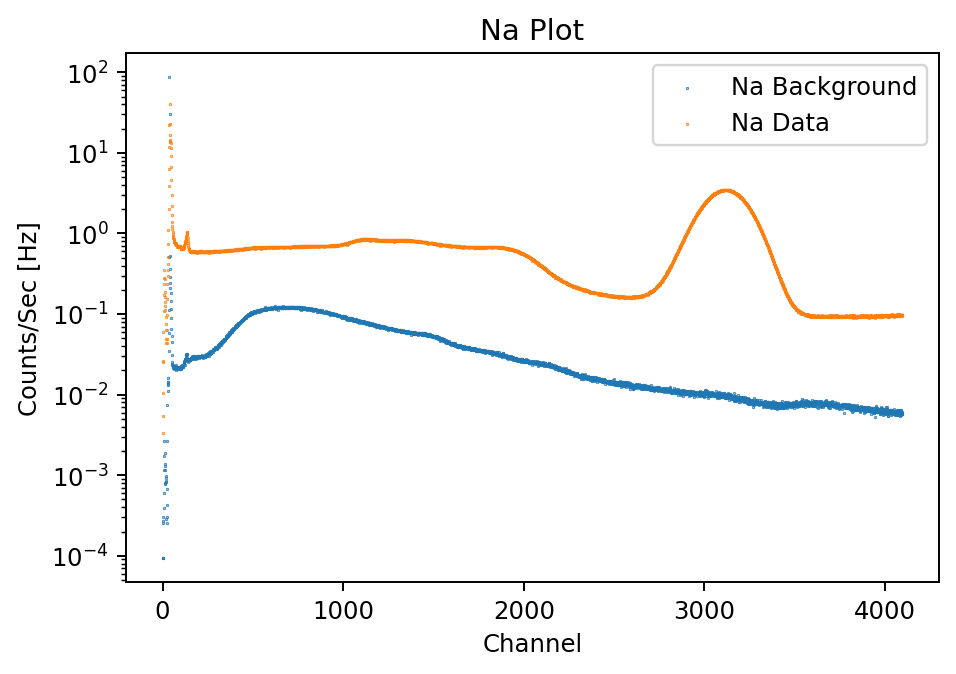

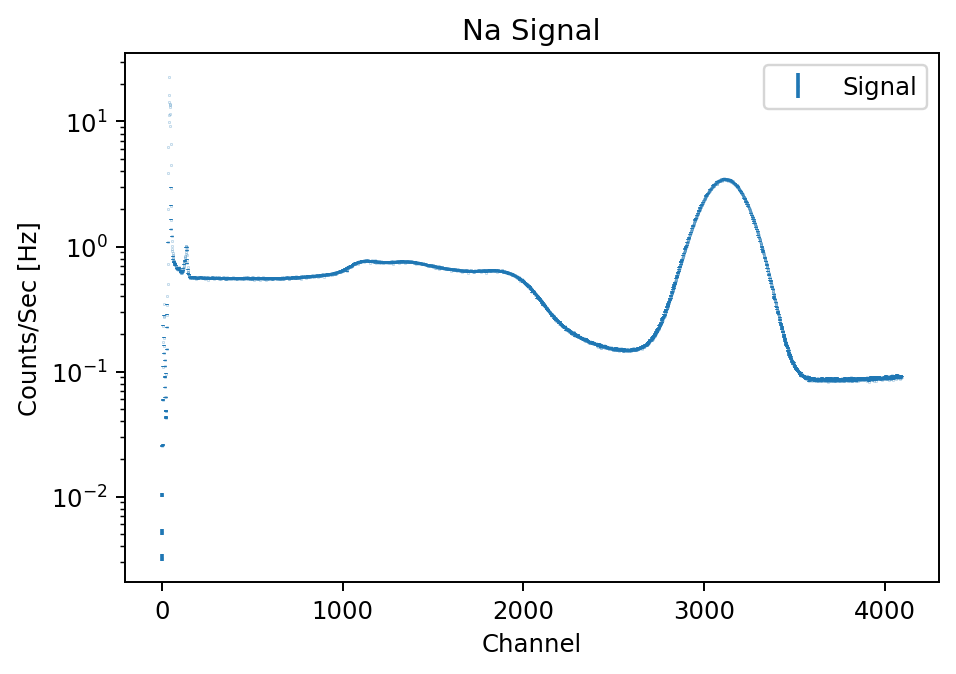

In [10]:
plt.figure(dpi=175)
plt.title("Na Plot")
plt.xlabel("Channel")
plt.ylabel("Counts/Sec [Hz]")

plt.scatter(Na_bkg["Channel"], Na_bkg["Norm_Counts"], s=.1, alpha=1, label="Na Background")
plt.scatter(Na_data["Channel"], Na_data["Norm_Counts"], s=.1, alpha=1, label="Na Data")
plt.legend()
plt.yscale("log")
#plt.ylim(1,10**5)
#plt.legend()

#plt.savefig("Plots/Background.pdf")
plt.show()


plt.figure(dpi=175)
plt.title("Na Signal")
plt.xlabel("Channel")
plt.ylabel("Counts/Sec [Hz]")

plt.errorbar(Na_data["Channel"], Na_data["Norm_Counts"]-Na_bkg["Norm_Counts"],
             yerr=np.sqrt(Na_bkg["Norm_Error"]**2+Na_data["Norm_Error"]**2), 
             fmt="o", ms=.1, alpha=1, label="Signal")
plt.legend()
plt.yscale("log")
#plt.ylim(1,10**5)
#plt.legend()

#plt.savefig("Plots/Background.pdf")
plt.show()

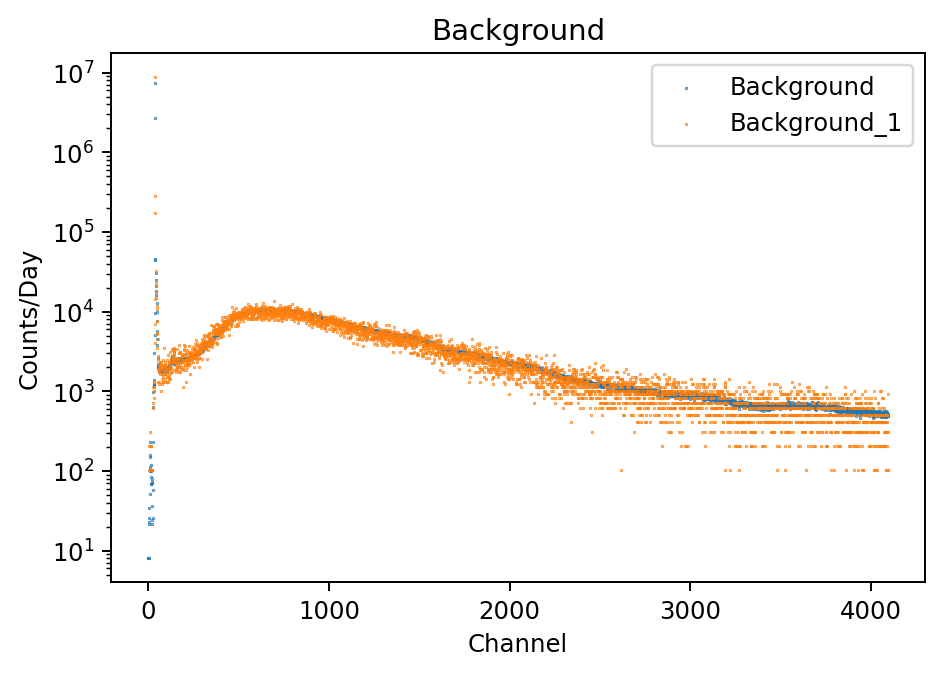

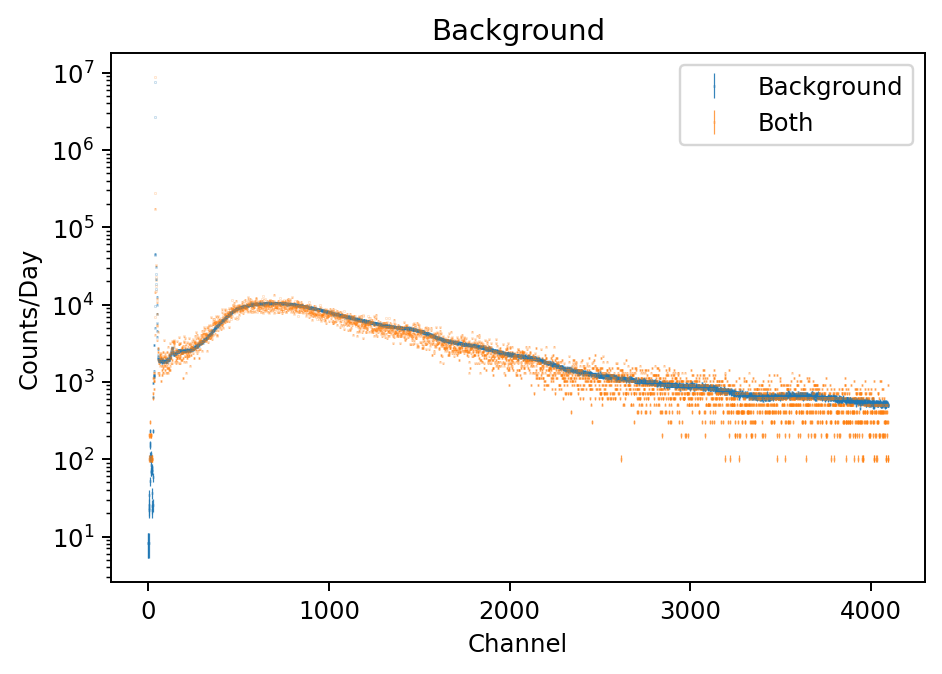

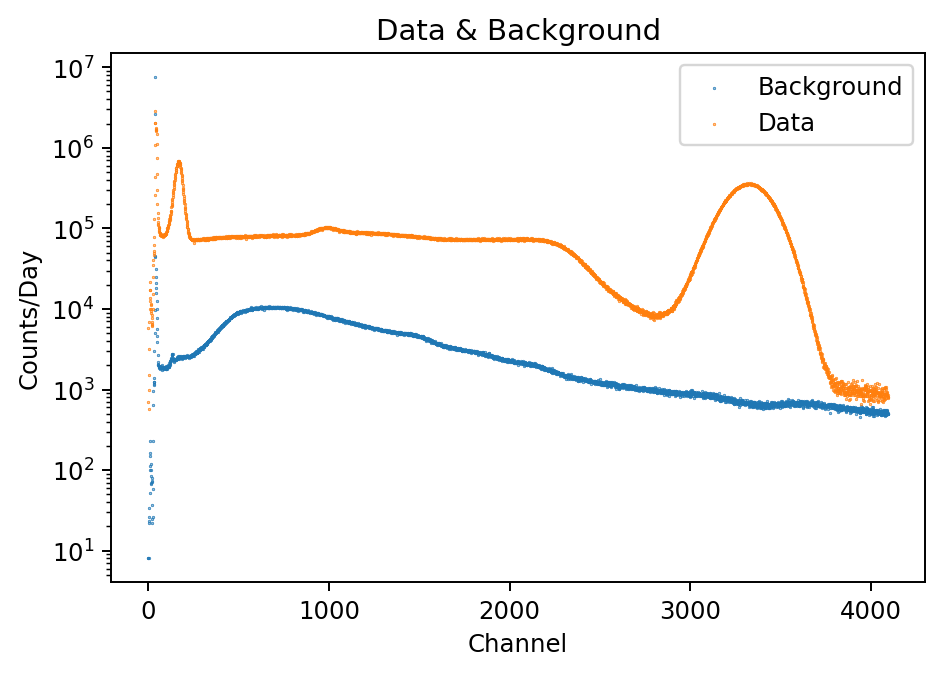

In [48]:
plt.figure(dpi=175)
plt.title("Background")
plt.xlabel("Channel")
plt.ylabel("Counts/Day")

plt.scatter(Na_bkg["Channel"], Na_bkg["Counts_Day"], s=.1, alpha=1, label="Na Background")
#plt.scatter(raw_bkg1["Channel"], raw_bkg1["Counts_Day"], s=.1, alpha=1, label="Background_1")
plt.legend()
plt.yscale("log")
#plt.ylim(1,10**5)
#plt.legend()

#plt.savefig("Plots/Background.pdf")
plt.show()

plt.figure(dpi=175)
plt.title("Background")
plt.xlabel("Channel")
plt.ylabel("Counts/Day")

plt.errorbar(raw_bkg0["Channel"], raw_bkg0["Counts_Day"], yerr = np.sqrt(raw_bkg0["Counts_Day"]),
             alpha=.9, fmt="o", ms=.1, elinewidth=.5, label="Background")
plt.errorbar(raw_bkg1["Channel"], raw_bkg1["Counts_Day"], yerr = np.sqrt(raw_bkg1["Counts_Day"]),
             alpha=.75, fmt="o", ms=.1, elinewidth=.5, label="Both")
plt.legend()
plt.yscale("log")
#plt.ylim(1,10**5)
#plt.legend()

plt.savefig("Plots/Background_Error.pdf")
plt.show()

plt.figure(dpi=175)
plt.title("Data & Background")
plt.xlabel("Channel")
plt.ylabel("Counts/Day")

plt.scatter(raw_bkg0["Channel"], raw_bkg0["Counts_Day"], s=.1, alpha=1, label="Background")
plt.scatter(raw_data1["Channel"], raw_data1["Counts_Day"], s=.1, alpha=1, label="Data")
plt.legend()
plt.yscale("log")
#plt.ylim(1,10**5)
#plt.legend()

#plt.savefig("Plots/Background.pdf")
plt.show()



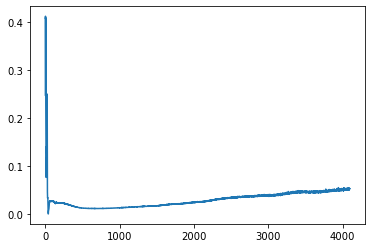

In [10]:
plt.plot(raw_bkg0["Channel"],np.sqrt(1/raw_data1["Counts"]+1/raw_bkg0["Counts"]))

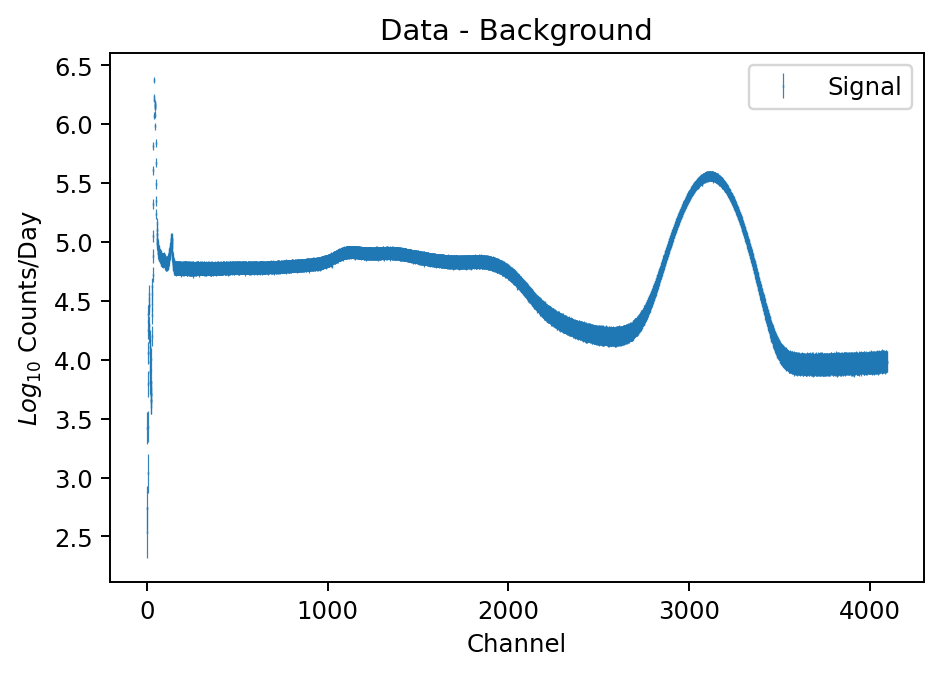

In [16]:
plt.figure(dpi=175)
plt.title("Data - Background")
plt.xlabel("Channel")
plt.ylabel("$Log_{10}$ Counts/Day")

plt.errorbar(raw_bkg0["Channel"], np.log10(raw_data1["Counts_Day"]-raw_bkg0["Counts_Day"]), 
             yerr = 1/np.sqrt(np.sqrt(raw_data1["Counts_Day"])+np.sqrt(raw_bkg0["Counts_Day"])), 
             alpha=.9, label="Signal", fmt="o", ms=.1, elinewidth=.5)
plt.legend()
#plt.yscale("log")
#plt.ylim(1,10**7)
#plt.legend()

#plt.savefig("Plots/Background.pdf")
plt.show()



# Spline Attempt

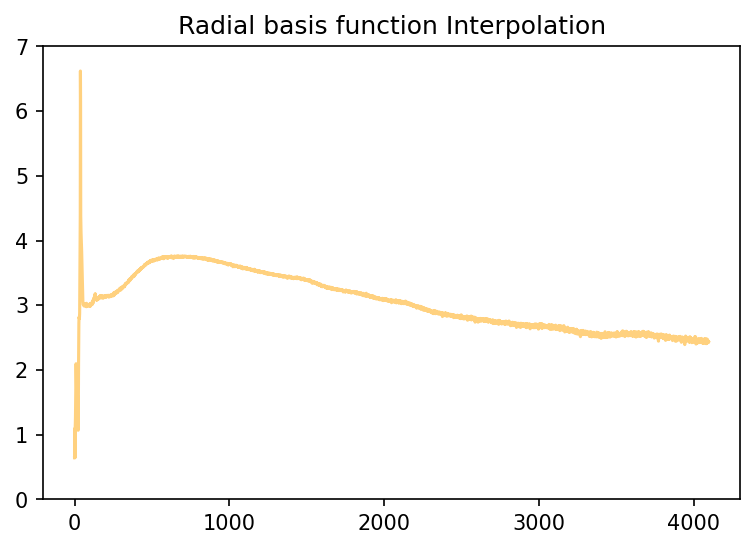

(0.0, 7.0)

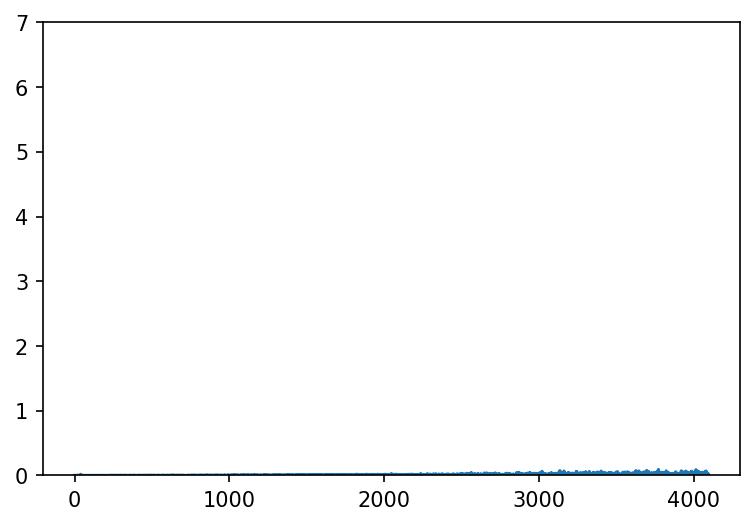

In [33]:
# Import the required libraries
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
  
# setup the data values
x = raw_data0["Channel"]
y = np.log10(raw_data0["Counts"])
xi = np.linspace(0, 4096, 4096)
  
# Interpolation using RBF
rbf = Rbf(x, y)
fi = rbf(xi)
  
plt.figure(dpi=150)
#plt.scatter(x, y, s=1, alpha=0.5)
plt.plot(xi, fi, color="orange", alpha=0.5)
#plt.plot(xi, np.cos(xi/2))
plt.title('Radial basis function Interpolation')
#plt.yscale("log")
plt.ylim(0,7)
plt.show()

plt.figure(dpi=150)
plt.plot(x, y-fi)
plt.ylim(0,7)
#plt.yscale("log")

### Data Fitting

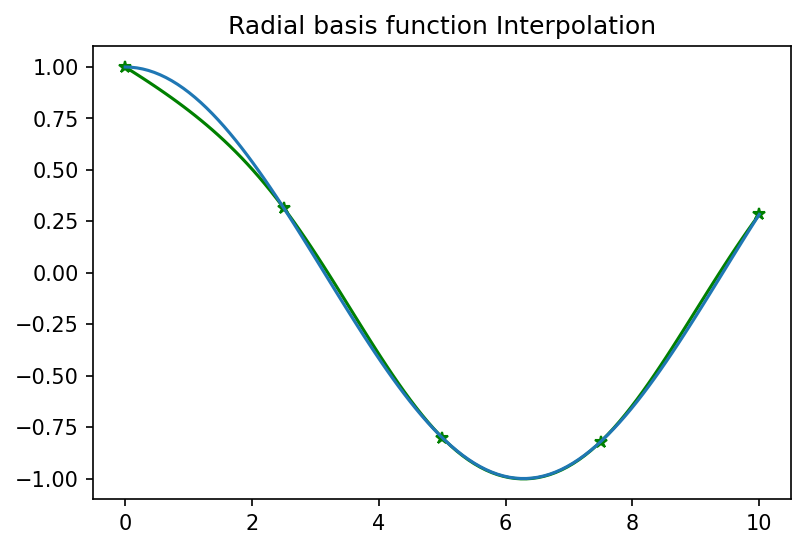

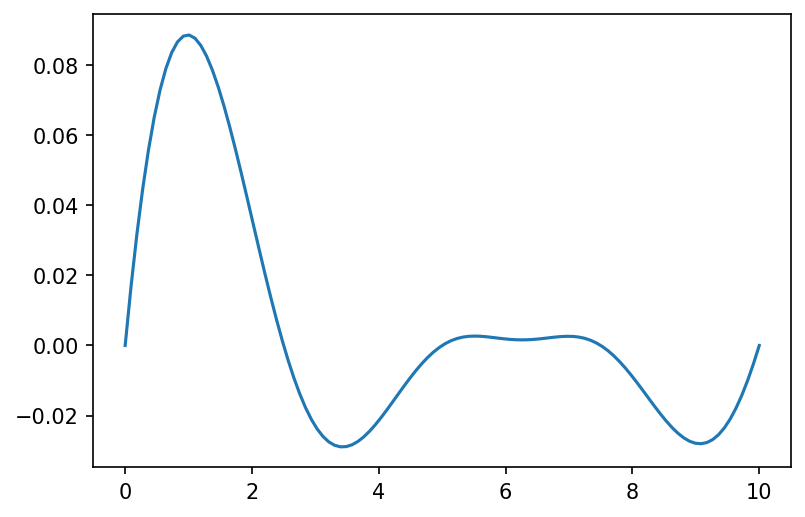

In [11]:
# Import the required libraries
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt
  
# setup the data values
x = np.linspace(0, 10, 5)
y = np.cos(x/2)
xi = np.linspace(0, 10, 110)
  
# Interpolation using RBF
rbf = Rbf(x, y)
fi = rbf(xi)
  
plt.figure(dpi=150)
plt.plot(x, y, '*', color="green")
plt.plot(xi, fi, 'green')
plt.plot(xi, np.cos(xi/2))
plt.title('Radial basis function Interpolation')
plt.show()

plt.figure(dpi=150)
plt.plot(xi, np.cos(xi/2)-fi)

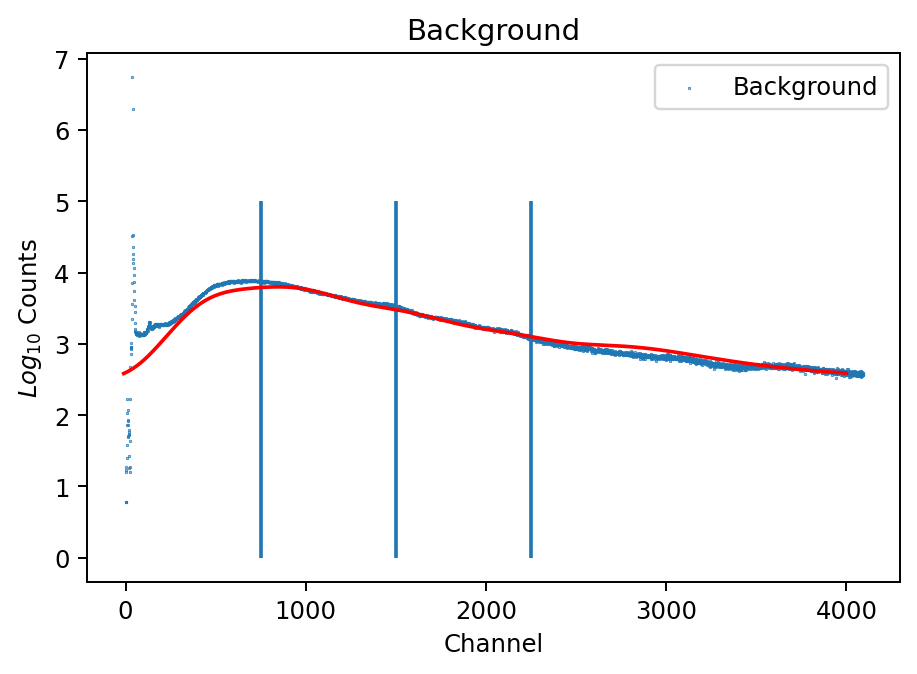

In [95]:
def landau(x, A,a,b, c=0):
    return A*np.exp(-0.5*(a*(x-b)+np.exp(-a*(x-b)))) + c

def triple_landau(x, A,B,C, a,b, c):
    return landau(x, A,a,b) + landau(x, B,a,2*b) + landau(x, C,a,3*b) + c

def five_landau(x, A,B,C,D,E, a,b, c):
    return landau(x, A,a,b) + landau(x, B,a,2*b) + landau(x, C,a,3*b) + landau(x, D,a,4*b) + landau(x, E,a,5*b) + c

def five_landau_free(x, A,B,C,D,E, a, b0,b1,b2,b3,b4, c):
    return landau(x, A,a,b0) + landau(x, B,a,b1) + landau(x, C,a,b2) + landau(x, D,a,b3) + landau(x, E,a,b4) + c


plt.figure(dpi=175)
plt.title("Background")
plt.xlabel("Channel")
plt.ylabel("$Log_{10}$ Counts")

plt.scatter(raw_data0["Channel"], np.log10(raw_data0["Counts"]), s=.1, alpha=1, label="Background")

x = np.arange(-10,4000,0.01)
#plt.plot(x, landau(x, *[2,0.003,600,2.5]), c="pink")
#plt.plot(x, triple_landau(x, *[2,0.75,0.5, 0.003, 650, 2.5]), c="orange")
#plt.plot(x, five_landau(x, *[2,0.75,0.5,0.3,0.3, 0.0035, 600, 2.5]), c="red")
plt.plot(x, five_landau_free(x, *[2,0.75,0.5,0.3,0.3, 0.0035, 600,1200,1800,2400,3000, 2.5]), c="red")

plt.vlines([750, 1500, 2250], 0, 5)

plt.legend()
#plt.yscale("log")
#plt.ylim(1,10**5)
#plt.legend()




#plt.savefig("Plots/Background.pdf")
plt.show()

[2.12497950e+00 5.57702299e-01 5.10835055e-01 2.99834597e-01
 1.37266745e-01 3.73856544e-03 6.02352139e+02 1.18852944e+03
 1.65125003e+03 2.19947912e+03 2.97523806e+03 2.57334697e+00]
[5.44565681e-03 1.06439702e-02 8.13654591e-03 5.63334581e-03
 2.92974723e-03 2.78862538e-05 2.13116551e+00 7.24348954e+00
 5.88521282e+00 5.72643407e+00 8.13287710e+00 1.78516752e-03]
[0.25626868 1.90853978 1.59279318 1.87881781 2.13434596 0.74590787
 0.35380725 0.60944973 0.35640955 0.2603541  0.27335215 0.06937143]


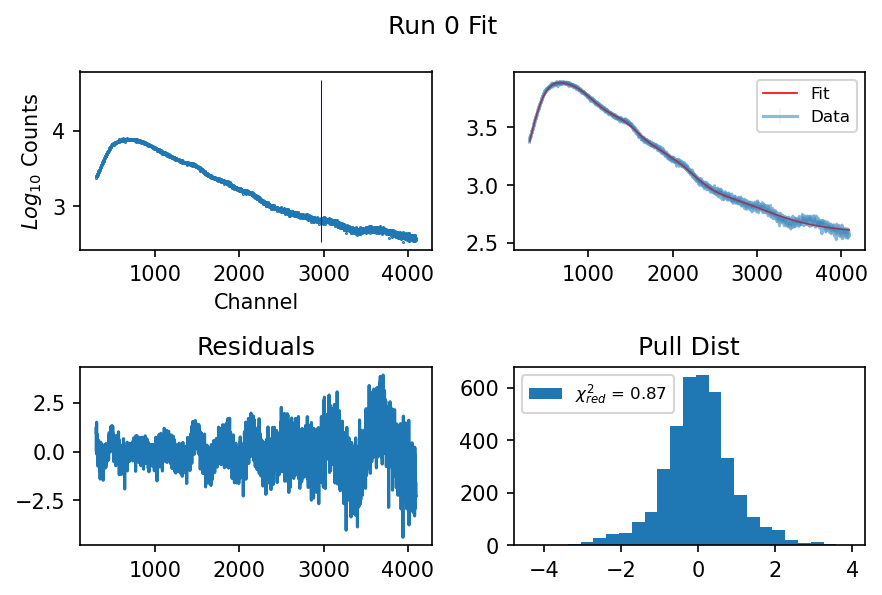

CPU times: user 2.9 s, sys: 74.8 ms, total: 2.97 s
Wall time: 3 s


In [101]:
%%time

func = five_landau_free
data_set = raw_data0
run_num = 0

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Run {run_num} Fit")
plt.subplot(2, 2, 1)
plt.xlabel("Channel")
plt.ylabel("$Log_{10}$ Counts")

keeps = data_set["Channel"] > 300

removes = []#np.arange(0,10,1)#[0,1,2,3,4,5]#[0,1,3]#[6, 10, 11]

if len(removes) != 0:
    Channel = np.delete(data_set["Channel"][keeps].values, removes)#[keeps]
    Counts = np.delete(data_set["Counts"][keeps].values, removes)#[keeps]
    
else:
    Channel = (data_set["Channel"][keeps].values)
    Counts = np.log10(data_set["Counts"][keeps].values)

plt.scatter(Channel, Counts, s=.2)

errors = 0.25/np.sqrt(50*Counts+10)

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, signal.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, Channel, Counts, maxfev=10**5, #sigma=errors,
                                     #p0=[2,0.75,0.5,0.2,0.1, 0.003, 650, 2.5],
                                     p0=[2,0.75,0.5,0.3,0.3, 0.0035, 600,1200,1800,2400,3000, 2.5],
                                     #bounds=([-10**10,-0.1,0], [-1,-0.01,10**8])
                                    )
#Mean Lines
plt.vlines(pars[-2],np.min(Counts),np.max(Counts)*1.2, 
           #label=f"{-pars[1]:.2E} ({np.sqrt(cov.diagonal())[1]:.2E})", 
           color="blue", lw=0.5)

#plt.legend(title="Lines", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.arange(np.min(Channel)*1.01,np.max(Channel),0.001)

plt.errorbar(Channel, Counts, yerr=errors, 
             ms=.2, elinewidth=.1, alpha=0.5, label="Data")
plt.plot(x, func(x, *pars), color="red", lw=.8, label=f"Fit")#: $n={pars[-1]:2.2f} ({np.sqrt(cov[-1,-1]):.2f})$")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (Counts-func(Channel, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(Channel, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 25, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
#plt.savefig(f"Plots/Bi_Run2_ConductivityFit.pdf")
plt.show()

In [66]:
residuals

array([-3.02066463, -2.08168293, -0.38487153,  1.24849157,  5.03974939,
        2.35477967,  2.00250452,  1.57115605,  0.50848048, -0.55568044,
        0.14607721, -0.08993253, -0.41007371,  0.5280563 ,  0.88168393,
       -1.98252694, -2.59801821, -1.76254252, -2.30727785, -1.86979348,
       -0.90197951, -2.38876837, -2.05034366, -1.55937121, -0.73692605,
       -1.32617854, -0.72931408, -0.78429706, -0.2119618 ,  1.04235872,
        0.58192769,  0.69872063,  0.63526925,  2.24957127,  1.48466631,
        0.39476528,  0.59784832,  1.47889825,  1.84617532,  1.85125775,
        1.33482255,  0.77189631,  1.59501341,  0.77606701,  1.05170851,
        0.99419479,  0.39844883,  0.60203623,  0.81329037,  0.33934958,
        0.03500134,  1.02127542,  0.75162716,  1.37606749,  0.00506033,
       -0.71489857, -0.68370983, -0.62817132, -0.33089351, -0.05012278,
        0.25143975, -0.03504653, -0.8875857 , -0.30904969, -0.54238705,
       -0.75006001, -1.46273211, -0.78378466, -0.56598676,  0.18

In [127]:
np.random.normal(0.3, 0.05, [2, 1])

array([[0.28980825],
       [0.19154942]])

In [131]:
num = 2
results = (np.random.normal(Channel,0.001, [num, len(Channel)]) * 
           np.random.normal(Counts,Counts*0.01, [num, len(Channel)]) *
           np.random.normal(0.003, 0.0005, [num, len(Channel)]) /
           np.random.normal(.0315, 0.0005, [num, len(Channel)]))


In [132]:
results

array([[ 3029.74402182,  5742.23501497,  8985.87888933, 12805.64918039,
        19110.97162944, 14699.09956543, 21953.49436864, 23975.44913894,
        29497.96666948, 36620.86653544, 34593.46132352],
       [ 2640.60791415,  6221.43455343, 12399.02668288, 12031.82350051,
        18736.23168775, 20494.25285162, 17107.13118633, 22300.45768147,
        20543.12661911, 28542.83358136, 38434.92231119]])

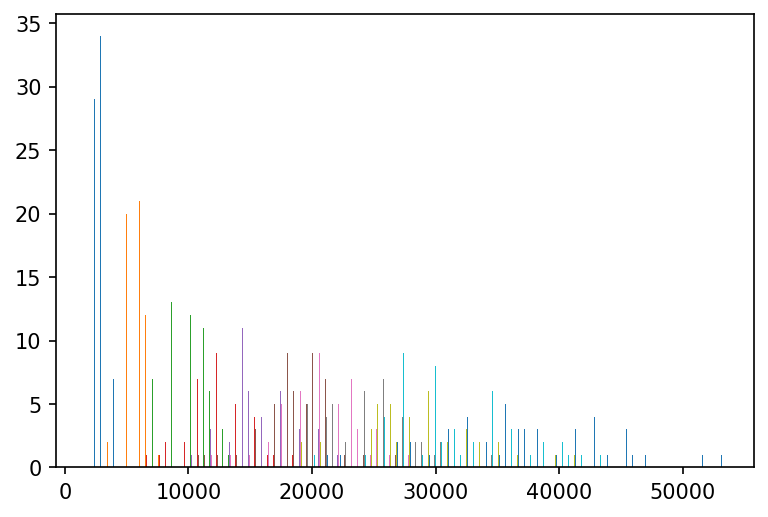

In [130]:
plt.figure(dpi=150)

plt.hist(results, 100)

plt.show()